In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display
data = pd.read_csv("./dataset.csv")

Delhi Durbar


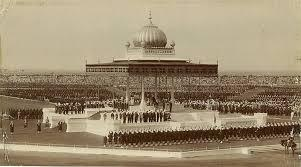

The Delhi Durbar (lit. "Court of Delhi") was an Indian imperial-style mass assembly organized by the British at Coronation Park, Delhi, India, to mark the succession of an Emperor or Empress of India. Also known as the Imperial Durbar, it was held three times, in 1877, 1903, and 1911, at the height of the British Empire. The 1911 Durbar was the only one that a sovereign, George V, attended. The term was derived from the common Persian term durbar.

Called the "Proclamation Durbar", the Durbar of 1877, for which the organisation was undertaken by Thomas Henry Thornton, was held beginning on 1 January 1877 to proclaim Queen Victoria as Empress of India by the British. The 1877 Durbar was largely an official event and not a popular occasion with mass participation like later durbars in 1903 and 1911. It was attended by the 1st Earl of Lytton—Viceroy of India, maharajas, nawabs and intellectuals.[1]

Inside the Victoria Memorial in Calcutta is an inscription taken from the Message of Queen

In [8]:
max = 0
index = -1
query =input()
for i in range(203):    
    text = data["Event Name"][i]
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text, query])
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    if(max < cosine_sim[0][0]):
        index = i
        max = cosine_sim[0][0]
try:        
    print(data["Event Name"][index])
    display(Image("./download/"+data["Event Name"][index]+".jpeg"))
    print(data["Important Info"][index])
except:
    print("query not matched :(")

In [2]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display, HTML

data = pd.read_csv("dataset.csv")

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(data["Important Info"])

# Function to retrieve event information based on event name or brief description
def retrieve_event_info(query):
    query_vector = vectorizer.transform([query])

    # Calculate cosine similarity for event names
    event_names_vector = vectorizer.transform(data["Event Name"])
    event_name_similarity = cosine_similarity(query_vector, event_names_vector)

    # Calculate cosine similarity for important info
    important_info_similarity = cosine_similarity(query_vector, tfidf_matrix)

    # Combine the similarities
    combined_similarity = event_name_similarity + important_info_similarity

    # Get indices of top matches
    most_similar_indices = combined_similarity.argsort()[0, :-6:-1]

    event_info_list = []
    for idx in most_similar_indices:
        event_info = {
            "event_name": data.loc[idx, "Event Name"],
            "important_info": data.loc[idx, "Important Info"]
        }
        event_info_list.append(event_info)
    return event_info_list

# Get user input for the event name or brief description
query = input("Enter an event name or brief description (or 'quit' to exit): ")

while query.lower() != "quit":
    event_info_list = retrieve_event_info(query)

    if event_info_list:
        for event_info in event_info_list:
            event_name = event_info["event_name"]
            print(f"{event_name}")  # Print event name in bold
            image_path = f"./download/{event_name}.jpeg"
            if os.path.exists(image_path):
                display(Image(filename=image_path))  # Display image
            else:
                print(f"Image not found for {event_name}")
            display(HTML(f"<p>{event_info['important_info']}</p>"))  # Display description
            print("\n")  # Add line break to trigger scrollbar

    else:
        print("No matching events found.")

    query = input("Enter an event name or brief description (or 'quit' to exit): ")

print("Exiting the program. Thank you!")


Exiting the program. Thank you!



Top 5 Matching Events for 'panipat':


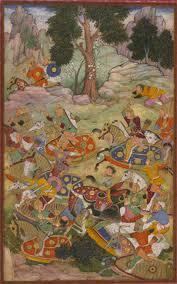

For further information can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------


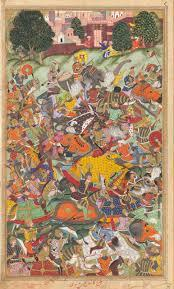

For further information can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------


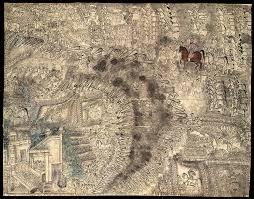

For further information can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------


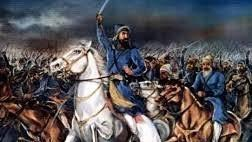

For further information can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------


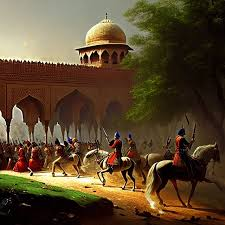

For further information can refer to the wikipedia links  


------------------------------------------------------------------------------------------------------------------------------------------------------
Exiting the program. Thank you!


In [1]:
import os
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display ,HTML

data = pd.read_csv("dataset.csv")

# Function to construct a Wikipedia URL from an event name
def construct_wikipedia_url(event_name):
    # Normalize the event name to fit URL format (spaces to underscores, etc.)
    normalized_name = event_name.replace(" ", "_").replace('&', 'and')
    return f"https://en.wikipedia.org/wiki/{normalized_name}"

# Function to retrieve event information based on event name or brief description
def retrieve_event_info(query):
    query_vector = vectorizer.transform([query])

    # Calculate cosine similarity for event names
    event_names_vector = vectorizer.transform(data["Event Name"])
    event_name_similarity = cosine_similarity(query_vector, event_names_vector)

    # Calculate cosine similarity for important info
    important_info_similarity = cosine_similarity(query_vector, tfidf_matrix)

    # Combine the similarities
    combined_similarity = event_name_similarity + important_info_similarity

    threshold = 0.1
    max_similarity = combined_similarity.max()
    if max_similarity < threshold:
        return []

    # Get indices of top matches
    most_similar_indices = combined_similarity.argsort()[0, :-6:-1]

    # Retrieve events in the order of dataset indices
    ordered_event_info_list = []
    for idx in range(len(data)):
        if idx in most_similar_indices:
            event_info = {
                "event_name": data.loc[idx, "Event Name"],
                "important_info": data.loc[idx, "Important Info"],
                "event_wikipedia_url": construct_wikipedia_url(data.loc[idx, "Event Name"])
            }
            ordered_event_info_list.append(event_info)

    return ordered_event_info_list

def display_images(event_info_list):
    for event_info in event_info_list:
        event_name = event_info["event_name"]
        image_path = f"./download/{event_name}.jpeg"
        if os.path.exists(image_path):
            display(Image(filename=image_path))
        else:
            print(f"Image not found for {event_name}")

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(data["Important Info"])

# Get user input for the event name or brief description
while True:
    query = input("Enter an event name or brief description (or 'quit' to exit): ")
    if query.lower() == "quit":
        print("Exiting the program. Thank you!")
        break

    event_info_list = retrieve_event_info(query)

    if event_info_list:
        print(f"\nTop 5 Matching Events for '{query}':")
        for idx, event_info in enumerate(event_info_list[:5], start=1):
            
            # Using HTML to display information more readably
            display(HTML(f"<strong>Event Name:</strong> {event_info['event_name']}"))
            # Display image for the event
            event_name = event_info['event_name']
            image_path = f"./download/{event_name}.jpeg"
            if os.path.exists(image_path):
                display(Image(filename=image_path))
            else:
                print(f"Image not found for {event_name}")
            display(HTML(f"<strong>Important Info:</strong> <p>{event_info['important_info']}</p>"))
            print("For further information can refer to the wikipedia links  ")
            display(HTML(f"<a href='{event_info['event_wikipedia_url']}'>{event_info['event_wikipedia_url']}</a>"))
            print("-" * 150)

    else:
        print("No matching events found :(")